## This notebook is for Forecast Accuracy analysis. 
- The histograms are for the distribution of forecast accuracy. We can see that mostly the FA is normaly distributed around 0.5.
- The line graph show the ratio of people who continously (Through out different quarters) have FA higher than 0.5 + check or lower than 0.5 - check

In [13]:
import numpy as np
import pandas as pd
import os
import glob
import yfinance as yf
import re
import ast
import matplotlib.pyplot as plt
from utils import *
import sys
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,10)})

In [3]:
q1 = pd.read_csv("e:\FA_tracking\Four_part\cpt_qt_1_by_user.csv")
q2 = pd.read_csv("e:\FA_tracking\Four_part\cpt_qt_2_by_user.csv")
q3 = pd.read_csv("e:\FA_tracking\Four_part\cpt_qt_3_by_user.csv")
q4 = pd.read_csv("e:\FA_tracking\Four_part\cpt_qt_4_by_user.csv")

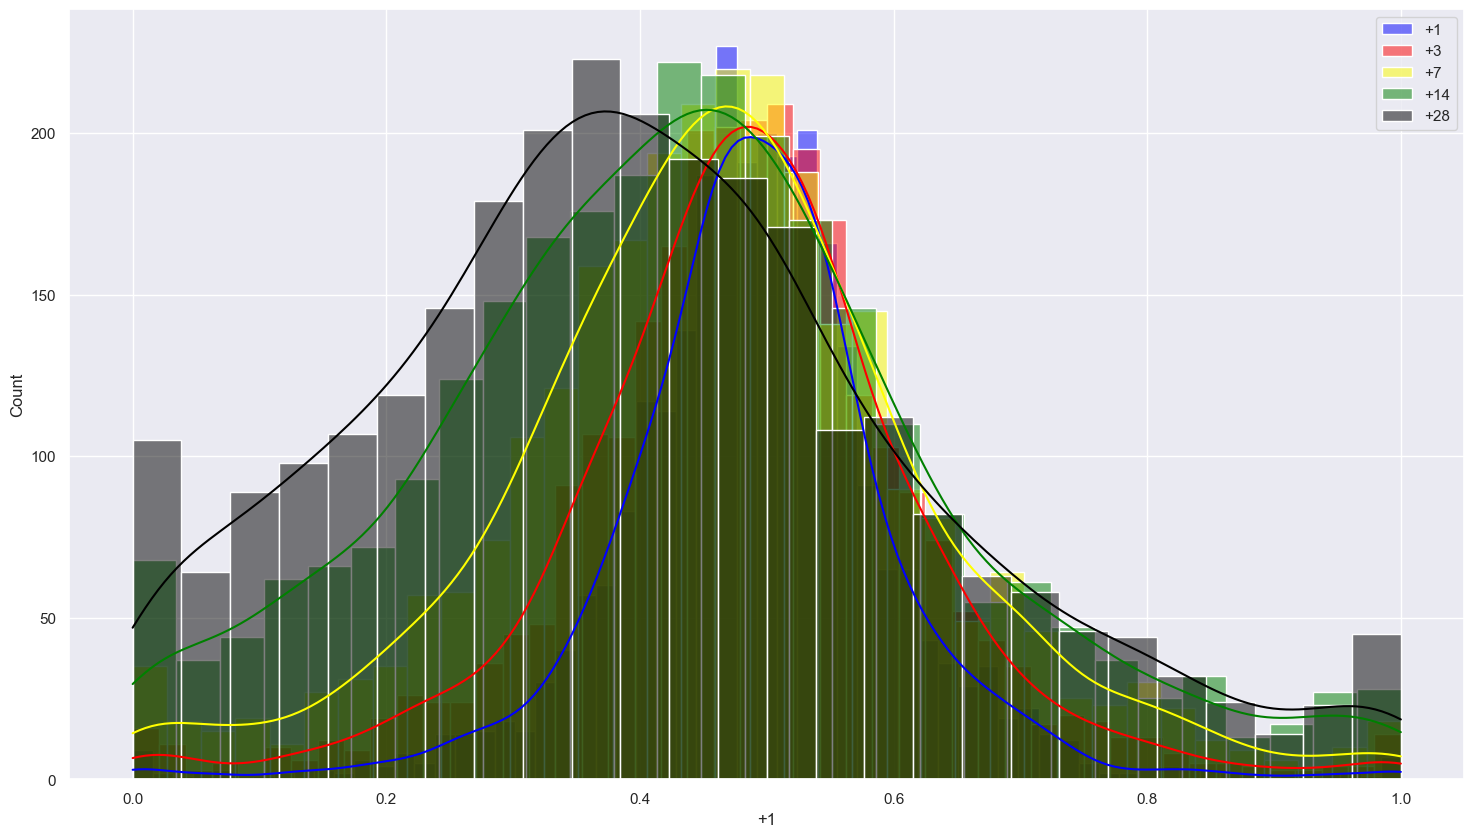

In [15]:
FA_user = q1
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+1',color="blue", label="+1", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+3',color="red", label="+3",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+7',color="yellow", label="+7", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+14',color="green", label="+14",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+28',color="black", label="+28",kde=True)
plt.legend() 
plt.show()

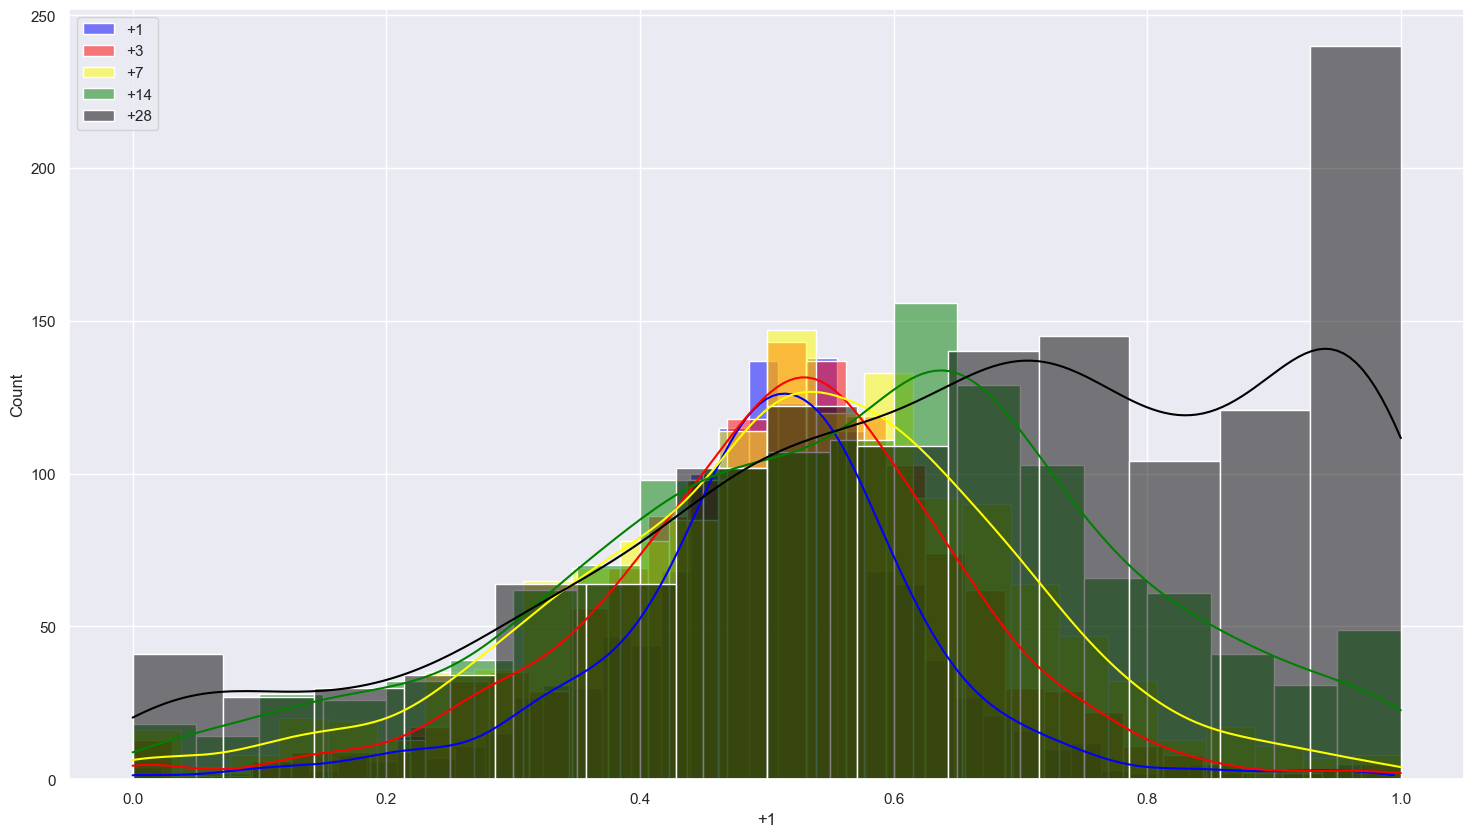

In [16]:
FA_user = q2
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+1',color="blue", label="+1", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+3',color="red", label="+3",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+7',color="yellow", label="+7", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+14',color="green", label="+14",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+28',color="black", label="+28",kde=True)
plt.legend() 
plt.show()

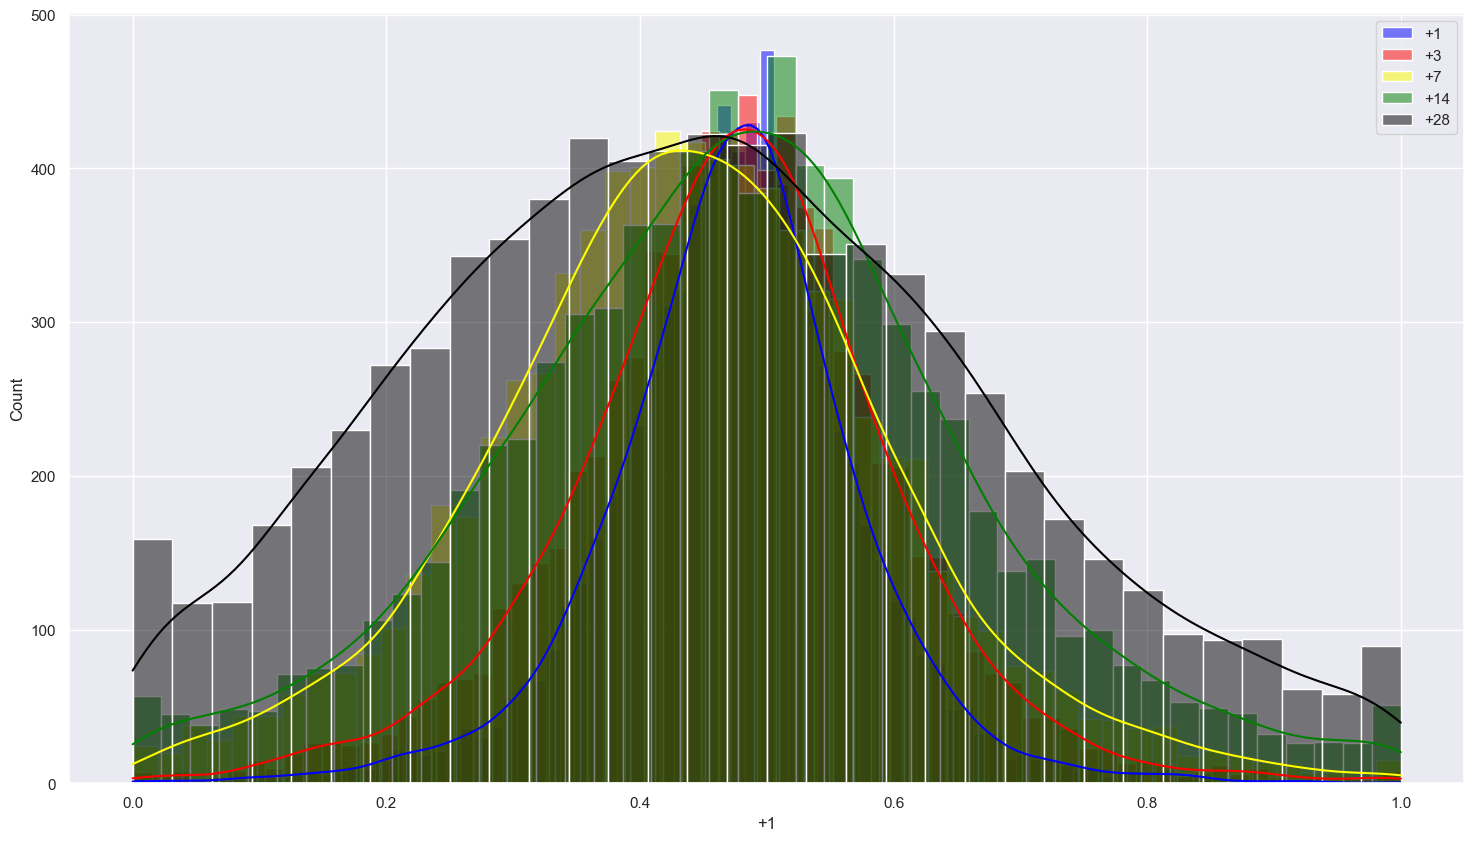

In [17]:
FA_user = q3
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+1',color="blue", label="+1", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+3',color="red", label="+3",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+7',color="yellow", label="+7", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+14',color="green", label="+14",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+28',color="black", label="+28",kde=True)
plt.legend() 
plt.show()

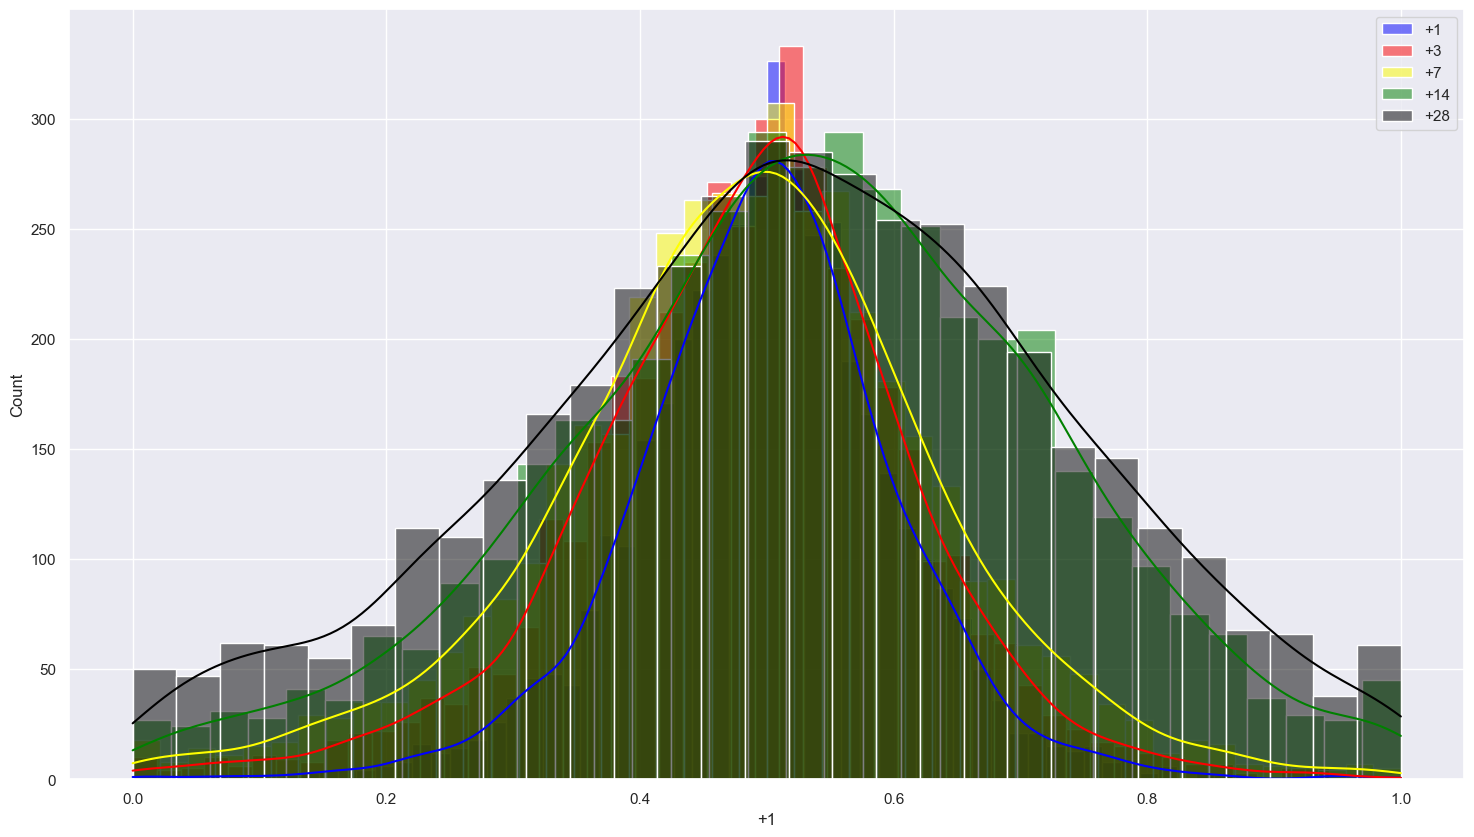

In [18]:
FA_user = q4
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+1',color="blue", label="+1", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+3',color="red", label="+3",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+7',color="yellow", label="+7", kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+14',color="green", label="+14",kde=True)
sns.histplot(data=FA_user.loc[FA_user['message_count']>=100], x='+28',color="black", label="+28",kde=True)
plt.legend() 
plt.show()

In [19]:
q1 = q1.loc[q1['message_count']>=100]
q2 = q2.loc[q2['message_count']>=100]
q3 = q3.loc[q3['message_count']>=100]
q4 = q4.loc[q4['message_count']>=100]

In [20]:
qs = [q1,q2,q3,q4]
for i in range(4):
    qs[i]['qt'] = i+1
allq = pd.concat(qs)
allq.head()

C:\Users\xl2860\AppData\Local\Temp\51\ipykernel_10712\2867200756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qs[i]['qt'] = i+1


,Unnamed: 0,user_id,+1,+3,+7,+14,+28,message_count,qt
0,0,747002,0.520165,0.534547,0.537582,0.548225,0.561112,22737,1
1,1,2011874,0.547317,0.589059,0.565139,0.671686,0.646145,10493,1
2,2,1578923,0.562316,0.578997,0.612568,0.619282,0.642887,9532,1
3,3,1355858,0.475475,0.523687,0.510503,0.503017,0.432849,8950,1
4,4,2084946,0.463383,0.521813,0.490240,0.461942,0.417660,7633,1


In [21]:
q_count = allq.groupby(by = ['user_id'])[['user_id']].count().rename(columns = {'user_id':'qt_count'}).reset_index()
allq = allq.merge(q_count,on = 'user_id')
allq.head()

,Unnamed: 0,user_id,+1,+3,+7,+14,+28,message_count,qt,qt_count
0,0,747002,0.520165,0.534547,0.537582,0.548225,0.561112,22737,1,1
1,1,2011874,0.547317,0.589059,0.565139,0.671686,0.646145,10493,1,4
2,11,2011874,0.516299,0.501928,0.596565,0.646688,0.644234,2853,2,4
3,516,2011874,0.529121,0.454097,0.413623,0.375123,0.655479,1013,3,4
4,1053,2011874,0.500000,0.372973,0.400000,0.372973,0.316216,370,4,4


In [22]:
useq = allq.loc[allq['qt_count']>1]
lis_dic = []
for i in useq['user_id']:
    dic = {'user_id':i}
    sub = useq.loc[useq['user_id'] == i]
    dic['qts'] = tuple(sub['qt'])
    dic['avg_mes'] = sub['message_count'].mean()
    for j in ['+1','+3','+7','+14','+28']:
        dic[j+'avg'] = sub[j].mean()
        dic[j+'min'] = sub[j].min()
        dic[j+'max'] = sub[j].max()
    lis_dic.append(dic)
r1 = pd.DataFrame(lis_dic).drop_duplicates()
r1.head()

,user_id,qts,avg_mes,+1avg,+1min,+1max,+3avg,+3min,+3max,+7avg,+7min,+7max,+14avg,+14min,+14max,+28avg,+28min,+28max
0,2011874,"(1, 2, 3, 4)",3682.25,0.523184,0.500000,0.547317,0.479514,0.372973,0.589059,0.493832,0.400000,0.596565,0.516617,0.372973,0.671686,0.565519,0.316216,0.655479
4,1578923,"(1, 2, 3, 4)",7062.00,0.533584,0.479914,0.605668,0.559794,0.457481,0.701619,0.601972,0.500969,0.745344,0.624744,0.538751,0.798785,0.666726,0.526638,0.878543
8,1355858,"(1, 2, 3, 4)",5193.25,0.480041,0.474208,0.489222,0.461722,0.394192,0.523687,0.446992,0.378148,0.510503,0.424327,0.299609,0.503017,0.398293,0.309956,0.538423
12,2084946,"(1, 2, 3)",5985.00,0.466960,0.443670,0.493827,0.457594,0.389771,0.521813,0.436825,0.382716,0.490240,0.423988,0.377425,0.461942,0.415699,0.388519,0.440917
15,187279,"(1, 2, 3, 4)",2205.50,0.464655,0.414474,0.491256,0.532222,0.517442,0.555921,0.577195,0.500000,0.726974,0.538363,0.424419,0.657895,0.535265,0.438953,0.615132


In [23]:
def check_fa(fa, step = 0.0005, num = 1000):
    r =[]
    base = fa.shape[0]
    for i in ['+1','+3','+7','+14','+28']:
        for j in range(1,num+1):
            c1 = 0.5 + step * j
            c2 = 0.5 - step * j
            use1 = fa.loc[fa[i+'min'] >= c1].shape[0] 
            use2 = fa.loc[fa[i+'max'] <= c2].shape[0]
            use3 = (use1 + use2)/base
            r.append({'day':i, 'check':step * j, 'ratio':use3})
    return pd.DataFrame(r)

<Axes: xlabel='check', ylabel='ratio'>

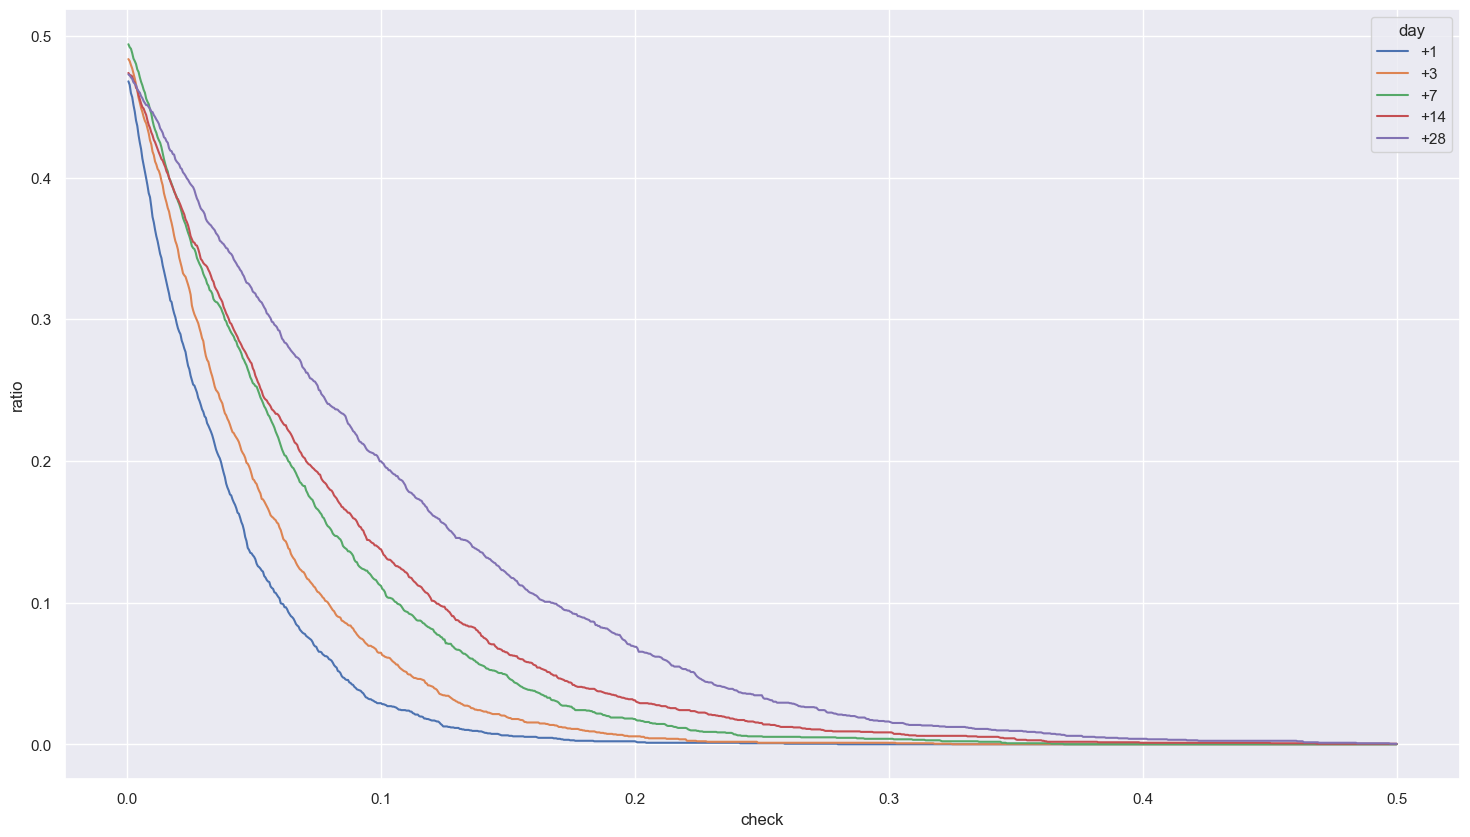

In [25]:
rdf = check_fa(r1)
sns.lineplot(data=rdf, x="check", y="ratio",hue = 'day')